# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Makiatul Musyaropah
- **Email:** makiatulmusyaropah@gmail.com
- **ID Dicoding:** makiatulmsyr17

## Menentukan Pertanyaan Bisnis

1. Bagaimana kinerja penyewaan sepeda dalam beberapa tahun terakhir?
2. Bagaimana tren rata-rata penyewaan sepeda per bulan sepanjang tahun 2012?
2. Pada musim mana yang memiliki jumlah penyewaan terbanyak?
3. Berapa banyak jumlah penyewaan sepeda antara hari kerja dan akhir pekan?
4. Pada jam berapa penyewaan sepeda paling tinggi dalam sehari?





## Import Semua Packages/Library yang Digunakan

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Data hour_df

In [185]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/makiatulmsyr17/submission/refs/heads/main/data/hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


#### Data day_df

In [186]:
day_df = pd.read_csv("https://raw.githubusercontent.com/makiatulmsyr17/submission/refs/heads/main/data/day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


**Insight:**
- Dataset hour berisi data perjam
- Dataset day berisi data perhari

Dataset ini mencatat jumlah penyewaan sepeda berdasarkan unit waktu tertentu, yaitu jam (hr) dan hari (dteday). Berikut adalah penjelasan dari setiap kolom :
- instant: Indeks unik untuk setiap rekaman data.
- dteday: Tanggal kejadian penyewaan sepeda.
- season: Musim dalam setahun dengan nilai:
   - 1: Musim semi (spring)
   - 2: Musim panas (summer)
   - 3: Musim gugur (fall)
   - 4: Musim dingin (winter)
- yr: Tahun data diambil, dengan nilai:
   - 0: Tahun 2011
   - 1: Tahun 2012
- mnth: Bulan kejadian penyewaan sepeda (1 = Januari, 2 = Februari, ..., 12 = Desember).
- hr: Jam dalam sehari (0 hingga 23).
- holiday: Menunjukkan apakah hari tersebut merupakan hari libur atau tidak (diambil dari situs DCHR Holiday Schedule).
- weekday: Hari dalam seminggu (0 = Minggu, 1 = Senin, ..., 6 = Sabtu).
- workingday: Menunjukkan apakah hari tersebut adalah hari kerja atau bukan.
  - 1: Hari kerja (bukan akhir pekan atau hari libur).
  - 0: Bukan hari kerja (akhir pekan atau hari libur).
- weathersit: Kondisi cuaca saat penyewaan sepeda terjadi, dengan kategori:
  - 1: Cerah, berawan sedikit, atau sebagian berawan.
  - 2: Berkabut dengan kondisi berawan atau mendung.
  - 3: Salju ringan, hujan ringan + badai petir + awan tersebar.
  - 4: Hujan deras + hujan es + badai petir + kabut, atau salju + kabut.
- temp: Suhu yang dinormalisasi dalam skala Celsius (dibagi dengan 41, yaitu suhu maksimum).
- atemp: Suhu yang dirasakan (feels-like temperature) dalam skala Celsius yang sudah dinormalisasi (dibagi dengan 50).
- hum: Kelembaban yang dinormalisasi (dibagi dengan 100).
- windspeed: Kecepatan angin yang dinormalisasi (dibagi dengan 67).
- casual: Jumlah pengguna sepeda kasual (tanpa registrasi).
- registered: Jumlah pengguna sepeda yang terdaftar.
- cnt: Jumlah total sepeda yang disewa, termasuk pengguna kasual dan terdaftar.


### Assessing Data

In [187]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- Jumlah Baris: 731
- Jumlah Kolom: 16.
- Tipe Data:
  - int64: 11 kolom (bilangan bulat).
  - float64: 4 kolom (bilangan desimal).
  - object: 1 kolom (tipe string).

terdapat kolom yang tidak sesuai dengan type datanya yaitu kolom dteday

In [188]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- Jumlah Baris: 17.379
- Jumlah Kolom: 17.
- Tipe Data:
    - int64: 12 kolom (bilangan bulat).
    - float64: 4 kolom (bilangan desimal).
    - object: 1 kolom (tipe string).

Ini juga sama terdapat kolom yang tidak sesuai dengan type datanya yaitu kolom dteday

In [189]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Tidak ada Mising Values

In [190]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Tidak ada missing values di kedua dataset

In [191]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())

Jumlah duplikasi:  0


In [192]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())


Jumlah duplikasi:  0


Tidak ada duplicate data  di kedua dataset

In [193]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Range nilai masing kolom sudah sesuai tidak ada kesalahan

In [194]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Range nilai masing kolom sudah sesuai tidak ada kesalahan

**Insight:**
- Data secara keseluruhan sudah bagus, tapi terdapat kolom yang tidak sesuai dengan type datanya yaitu kolom dteday akan di ubah type datanya menjadi datetime.
- Beberapa kolom dengan nilai numerik sebenarnya merepresentasikan kategori, seperti yr, season, mnth, holiday, weekday, workingday, weathersit. Oleh karena itu, kolom-kolom ini akan dikonversi menjadi tipe data kategori atau string agar lebih mudah diinterpretasikan saat visualisasi data.(Mengubah nilai kategori numerik menjadi string yang lebih deskriptif)

### Cleaning Data

Mengubah type data kolom dteday dari object jadi  menjadi  datetime.

In [195]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

Cek untuk memastikan type data sudah berubah

In [196]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [197]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

type data sudah berubah ke datetime

Mengubah nilai kategori numerik menjadi string yang lebih deskriptif pada dataframe hour_df

In [198]:
# Mapping nilai kategori ke string yang lebih jelas
season_mapping = { "1": "Spring", "2": "Summer", "3": "Fall", "4": "Winter" }
yr_mapping = { "0": "2011", "1": "2012" }
mnth_mapping = { str(i): month for i, month in enumerate(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], 1) }
weekday_mapping = { "0": "Sunday", "1": "Monday", "2": "Tuesday", "3": "Wednesday", "4": "Thursday", "5": "Friday", "6": "Saturday" }
holiday_mapping = { "0": "No", "1": "Yes" }
workingday_mapping = { "0": "No", "1": "Yes" }


# Konversi kolom kategori ke string dengan label yang lebih deskriptif
hour_df["season"] = hour_df["season"].astype(str).map(season_mapping)
hour_df["yr"] = hour_df["yr"].astype(str).map(yr_mapping)
hour_df["mnth"] = hour_df["mnth"].astype(str).map(mnth_mapping)
hour_df["weekday"] = hour_df["weekday"].astype(str).map(weekday_mapping)
hour_df["holiday"] = hour_df["holiday"].astype(str).map(holiday_mapping)
hour_df["workingday"] = hour_df["workingday"].astype(str).map(workingday_mapping)

# Cek perubahan data
print(hour_df.head())
print(hour_df.dtypes)

   instant     dteday  season    yr mnth  hr holiday   weekday workingday  \
0        1 2011-01-01  Spring  2011  Jan   0      No  Saturday         No   
1        2 2011-01-01  Spring  2011  Jan   1      No  Saturday         No   
2        3 2011-01-01  Spring  2011  Jan   2      No  Saturday         No   
3        4 2011-01-01  Spring  2011  Jan   3      No  Saturday         No   
4        5 2011-01-01  Spring  2011  Jan   4      No  Saturday         No   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
instant                int64
dteday        datetime64[ns]
season                object
yr                

Mengubah nilai kategori numerik menjadi string yang lebih deskriptif pada dataframe day_df

In [199]:
# Mapping nilai kategori ke string yang lebih jelas
season_mapping = { "1": "Spring", "2": "Summer", "3": "Fall", "4": "Winter" }
yr_mapping = { "0": "2011", "1": "2012" }
mnth_mapping = { str(i): month for i, month in enumerate(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], 1) }
weekday_mapping = { "0": "Sunday", "1": "Monday", "2": "Tuesday", "3": "Wednesday", "4": "Thursday", "5": "Friday", "6": "Saturday" }
holiday_mapping = { "0": "No", "1": "Yes" }
workingday_mapping = { "0": "No", "1": "Yes" }
weathersit_mapping = {
    "1": "Clear/Few clouds",
    "2": "Mist/Cloudy",
    "3": "Light Snow/Rain",
    "4": "Heavy Rain/Snow"
}

# Konversi kolom kategori ke string dengan label yang lebih deskriptif
day_df["season"] = day_df["season"].astype(str).map(season_mapping)
day_df["yr"] = day_df["yr"].astype(str).map(yr_mapping)
day_df["mnth"] = day_df["mnth"].astype(str).map(mnth_mapping)
day_df["weekday"] = day_df["weekday"].astype(str).map(weekday_mapping)
day_df["holiday"] = day_df["holiday"].astype(str).map(holiday_mapping)
day_df["workingday"] = day_df["workingday"].astype(str).map(workingday_mapping)
day_df["weathersit"] = day_df["weathersit"].astype(str).map(weathersit_mapping)

# Cek perubahan data
print(day_df.head())
print(day_df.dtypes)

   instant     dteday  season    yr mnth holiday    weekday workingday  \
0        1 2011-01-01  Spring  2011  Jan      No   Saturday         No   
1        2 2011-01-02  Spring  2011  Jan      No     Sunday         No   
2        3 2011-01-03  Spring  2011  Jan      No     Monday        Yes   
3        4 2011-01-04  Spring  2011  Jan      No    Tuesday        Yes   
4        5 2011-01-05  Spring  2011  Jan      No  Wednesday        Yes   

         weathersit      temp     atemp       hum  windspeed  casual  \
0       Mist/Cloudy  0.344167  0.363625  0.805833   0.160446     331   
1       Mist/Cloudy  0.363478  0.353739  0.696087   0.248539     131   
2  Clear/Few clouds  0.196364  0.189405  0.437273   0.248309     120   
3  Clear/Few clouds  0.200000  0.212122  0.590435   0.160296     108   
4  Clear/Few clouds  0.226957  0.229270  0.436957   0.186900      82   

   registered   cnt  
0         654   985  
1         670   801  
2        1229  1349  
3        1454  1562  
4        151

**Insight:**
- Setelah melakukan konversi tipe data dan mengubah beberapa kolom numerik yang merepresentasikan kategori menjadi string dengan label yang lebih deskriptif, hasilnya telah sesuai dengan yang diharapkan. Data kini lebih mudah dipahami dan diinterpretasikan, terutama dalam proses analisis dan visualisasi.

## Exploratory Data Analysis (EDA)

### Explore hour_df

In [200]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,2,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,May,NaN,No,Saturday,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,16879,2512,11865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

Ringkasan Data Penyewaan Sepeda (`hour_df`)

Dataset ini berisi **17.379 baris data** dengan 16 kolom yang mencatat informasi penyewaan sepeda setiap jam. Berikut adalah beberapa ringkasan statistiknya:

 **Informasi Waktu dan Musim**  
- **Periode Data:** 1 Januari 2011 - 31 Desember 2012  
- **Musim dengan Data Terbanyak:** **Musim Gugur (Fall)**  
- **Tahun dengan Data Terbanyak:** **2012**  

**Rata-rata Penyewaan Sepeda**  
- **Total Rata-rata Penyewaan per Jam:** **189 sepeda**  
- **Jumlah Maksimum Penyewaan dalam 1 Jam:** **977 sepeda**  
- **Jumlah Minimum Penyewaan dalam 1 Jam:** **1 sepeda**  

**Pola Penyewaan Berdasarkan Waktu**  
- **Jam dengan Penyewaan Rata-rata Tertinggi:** **Pukul 17:00 (Sore)**  
- **Jam dengan Penyewaan Rata-rata Terendah:** **Pukul 04:00 (Dini Hari)**  

**Faktor Lingkungan yang Mempengaruhi Penyewaan**  
- **Suhu rata-rata:** **0.50 (dinormalisasi, berkisar antara 0-1)**  
- **Kelembaban rata-rata:** **62.7%**  
- **Kecepatan angin rata-rata:** **0.19 (dinormalisasi)**  

**Pola Penyewaan Berdasarkan Jenis Hari**  
- **Hari Kerja vs Akhir Pekan:** Lebih banyak penyewaan terjadi pada **hari kerja (weekday)** dibandingkan akhir pekan.  
- **Hari dengan Penyewaan Tertinggi:** **Sabtu**  


Melihat total penyewaan per jam

In [201]:
# Grouping by hour and summing the total rentals
rentals_per_hour = hour_df.groupby("hr")[["cnt"]].sum().reset_index()

# Renaming columns to English
rentals_per_hour.columns = ["Hour", "total_rentals"]

# Sorting values by total_rentals in descending order
rentals_per_hour = rentals_per_hour.sort_values(by="total_rentals", ascending=False)

# Display the result
rentals_per_hour

,Hour,total_rentals
17,17,336860
18,18,309772
8,8,261001
16,16,227748
19,19,226789
13,13,184919
12,12,184414
15,15,183149
14,14,175652
20,20,164550


**Insight :**

-  **Jam dengan Penyewaan Tertinggi**  
   - **Pukul 17:00 (5 sore) memiliki jumlah penyewaan tertinggi** sebanyak **336.860 kali**.  
   - **Pukul 18:00 (6 sore) dan 08:00 (8 pagi) juga memiliki jumlah penyewaan tinggi**.  
   - **Pola ini menunjukkan bahwa puncak penyewaan terjadi saat jam pulang kerja (sore) dan berangkat kerja (pagi)**.  

- **Jam dengan Penyewaan Menengah**  
   - Penyewaan juga cukup tinggi pada **pukul 12:00 - 15:00 (siang hingga sore)**.  
   - **Menunjukkan bahwa ada peningkatan penggunaan sepeda saat istirahat siang atau rekreasi sore hari**.  

-  **Jam dengan Penyewaan Terendah**  
   - **Pukul 04:00 memiliki penyewaan terendah (hanya 4.428 kali)**.  
   - **Pukul 3:00, 2:00, dan 1:00 juga memiliki jumlah penyewaan yang sangat rendah**, menunjukkan bahwa sedikit orang menyewa sepeda di dini hari.  

### Explore day_df

Melihat total Penyewaan per Tahun

In [202]:
# Grouping by year and summing the total rentals
performance_per_year = day_df.groupby("yr")[["cnt"]].sum().reset_index()

# Renaming columns to English
performance_per_year["yr"] = performance_per_year["yr"]
performance_per_year.columns = ["Year", "total_rentals"]

# Display the result
performance_per_year


,Year,total_rentals
0,2011,1243103
1,2012,2049576



**Insight**
- **Total Penyewaan per Tahun**  
   - **Pada tahun 2011, jumlah total penyewaan sepeda adalah 1.243.103 kali.**  
   - **Pada tahun 2012, jumlah total penyewaan meningkat menjadi 2.049.576 kali.**  
   - **Terjadi peningkatan sebesar 806.473 penyewaan dari tahun 2011 ke 2012** (sekitar **64,9% peningkatan**).  


 Menghitung rata-rata jumlah penyewaan sepeda beberapa bulan terakhir (2012)

In [203]:
# Filter only data for the year 2012 (yr == 2012)
average_per_month_2012 = day_df[day_df["yr"] == "2012"].groupby("mnth")[["cnt"]].mean().reset_index()

# Rename columns to be more descriptive
average_per_month_2012.columns = ["Month", "avg_rentals"]

# Sort by highest average rentals
average_per_month_2012 = average_per_month_2012.sort_values(by="avg_rentals", ascending=False)

# Display the result
average_per_month_2012


,Month,avg_rentals
11,Sep,7285.766667
1,Aug,6919.451613
6,Jun,6761.000000
5,Jul,6567.967742
10,Oct,6414.225806
8,May,6318.225806
0,Apr,5807.466667
7,Mar,5318.548387
9,Nov,5088.800000
2,Dec,3990.741935


**Insight :**
-  **Bulan dengan Penyewaan Tertinggi**  
   - **Juni memiliki rata-rata penyewaan tertinggi, yaitu 5.772 penyewaan per hari.**  
   - **September menempati posisi kedua dengan 5.766 penyewaan per hari.**  
   - **Agustus dan Juli juga memiliki angka penyewaan yang tinggi**, menunjukkan bahwa musim panas memiliki tingkat penyewaan yang lebih tinggi.

- **Bulan dengan Penyewaan Terendah**  
   - **Januari memiliki rata-rata penyewaan terendah, yaitu 2.176 penyewaan per hari.**  
   - **Februari dan Desember juga memiliki angka penyewaan yang rendah,** menunjukkan bahwa musim dingin atau cuaca buruk berdampak pada rendahnya penyewaan.

Melihat total jumlah penyewaan sepeda per musim

In [204]:
# Group by season and calculate total rentals
rentals_per_season = day_df.groupby("season")[["cnt"]].sum().reset_index()

# Rename the columns to be more descriptive
rentals_per_season.columns = ["Season", "total_rentals"]

# Sort the results by the total rentals in descending order
rentals_per_season = rentals_per_season.sort_values(by="total_rentals", ascending=False)

# Display the result
rentals_per_season


,Season,total_rentals
0,Fall,1061129
2,Summer,918589
3,Winter,841613
1,Spring,471348


**Insight:**
- **Musim dengan Penyewaan Tertinggi**  
   - **Musim Gugur (Fall) memiliki total penyewaan tertinggi, yaitu 1.061.129 penyewaan.**  
   - **Musim Panas (Summer) berada di posisi kedua dengan 918.589 penyewaan.**  
   - **Musim Dingin (Winter) masih memiliki jumlah penyewaan yang cukup tinggi, yaitu 841.613 penyewaan.**

- **Musim dengan Penyewaan Terendah**  
   - **Musim Semi (Spring) memiliki total penyewaan terendah, hanya 471.348 penyewaan.**  
   - Hal ini mungkin karena cuaca yang tidak menentu, seringnya hujan, atau peralihan musim yang membuat orang kurang tertarik untuk bersepeda.  

Melihat total penyewaan sepeda untuk hari kerja dan akhir pekan.

In [205]:
# Group by workingday and calculate total rentals
rentals_working_day = day_df.groupby("workingday")[["cnt"]].sum().reset_index()

# Rename the columns to be more descriptive
rentals_working_day.columns = ["day_type", "Total_Rentals"]

# Display the result
rentals_working_day


,day_type,Total_Rentals
0,No,1000269
1,Yes,2292410


**Insight**
- **Penyewaan Sepeda Lebih Tinggi pada Hari Kerja**  
   - Hari kerja (`Yes`): **2.292.410 penyewaan**  
   - Akhir pekan atau libur (`No`): **1.000.269 penyewaan**  
   - **Lebih dari dua kali lipat dibandingkan akhir pekan** → menunjukkan bahwa layanan sepeda lebih sering digunakan untuk **mobilitas harian daripada rekreasi.**

## Visualization & Explanatory Analysis

1. Bagaimana kinerja penyewaan sepeda dalam beberapa tahun terakhir?
2. Bagaimana tren rata-rata penyewaan sepeda per bulan sepanjang tahun 2012?
2. Pada musim mana yang memiliki jumlah penyewaan terbanyak?
3. Berapa banyak jumlah penyewaan sepeda antara hari kerja dan akhir pekan?
4. Pada jam berapa penyewaan sepeda paling tinggi dan paling rendah dalam sehari?





### Pertanyaan 1: Bagaimana kinerja penyewaan sepeda dalam beberapa tahun terakhir?

In [206]:
# Group by year and calculate total rentals
performance_per_year = day_df.groupby("yr")[["cnt"]].sum().reset_index()

# Rename the columns to be more descriptive
performance_per_year.columns = ["Year", "total_rentals"]

# Display the result
performance_per_year


,Year,total_rentals
0,2011,1243103
1,2012,2049576


<ipython-input-221-c076a7ff23ca>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Year", y="total_rentals", data=performance_per_year, palette=colors, ax=ax)


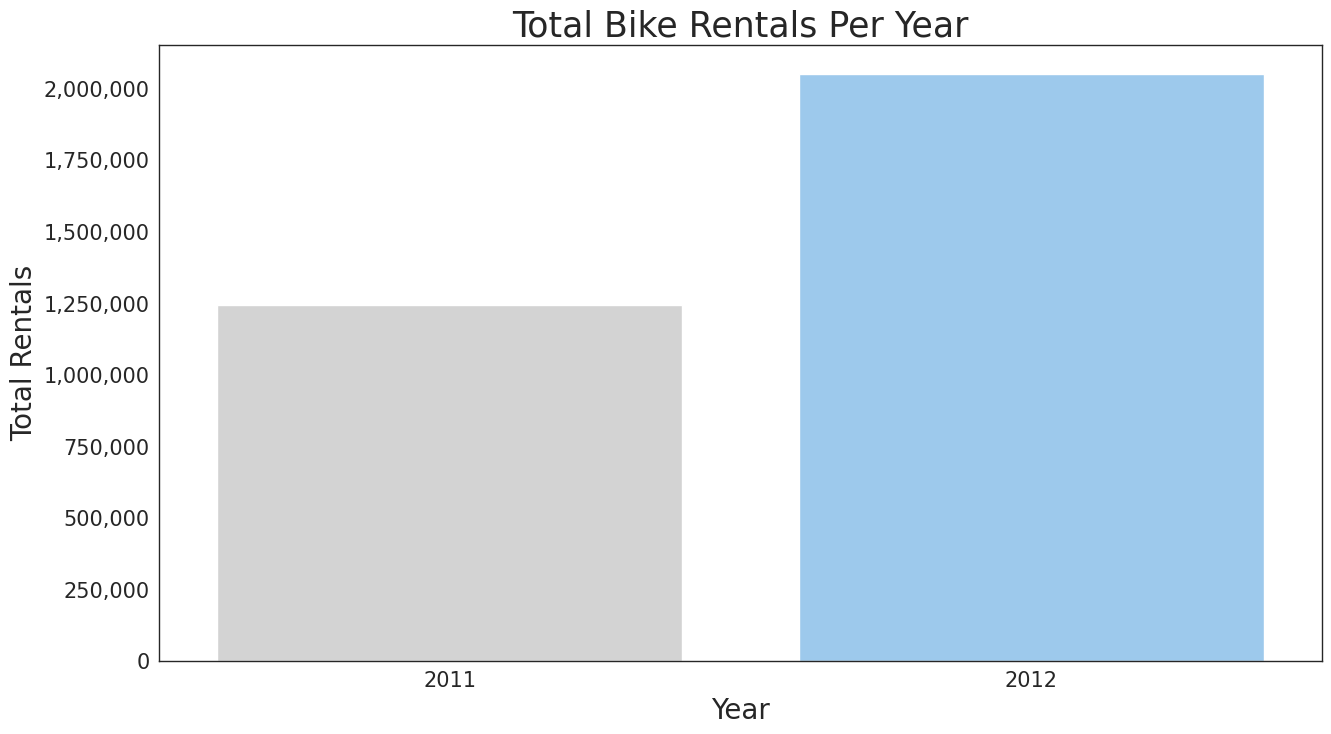

In [221]:
# Gunakan style dengan latar belakang putih
sns.set_style("white")

# Tentukan tahun dengan penyewaan tertinggi
max_year = performance_per_year.loc[performance_per_year["total_rentals"].idxmax(), "Year"]

# Tentukan warna: tahun dengan penyewaan tertinggi biru, lainnya abu-abu
colors = ["#90CAF9" if year == max_year else "#D3D3D3" for year in performance_per_year["Year"]]

# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(15, 8))

# Membuat barplot untuk total penyewaan per tahun
sns.barplot(x="Year", y="total_rentals", data=performance_per_year, palette=colors, ax=ax)

# Menampilkan kembali garis pinggir (spines)
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)  # Atur ketebalan garis jika perlu

# Menambahkan label dan judul
ax.set_ylabel("Total Rentals", fontsize=20)
ax.set_xlabel("Year", fontsize=20)
ax.set_title("Total Bike Rentals Per Year", fontsize=25)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)

# Memformat angka di sumbu y agar tampil dengan nilai asli
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

# Menampilkan grafik
plt.show()


- Kinerja penyewaan sepeda beberapa tahun terakhir mengalami peningkatan dari tahun 2011 ke 2012 total penyewaan meningkat
- Total penyewaan sepeda meningkat dari 1,243,103 pada tahun 2011 menjadi 2,049,576 pada tahun 2012.
- Ini menunjukkan adanya kenaikan sekitar 64.9% dalam jumlah peminjaman sepeda dari tahun pertama ke tahun kedua.


### Pertanyaan 2: Bagaimana tren rata-rata penyewaan sepeda per bulan sepanjang tahun 2012?

In [208]:
# Filter data only for the year 2012 (yr == 2012)
avg_permonth_2012 = day_df[day_df["yr"] == "2012"].groupby("mnth")[["cnt"]].mean().reset_index()

# Rename columns to make them clearer
avg_permonth_2012.columns = ["Month", "avg_rentals"]

# Sort by the highest average rentals
avg_permonth_2012 = avg_permonth_2012.sort_values(by="avg_rentals", ascending=False)

# Display the result
avg_permonth_2012


,Month,avg_rentals
11,Sep,7285.766667
1,Aug,6919.451613
6,Jun,6761.000000
5,Jul,6567.967742
10,Oct,6414.225806
8,May,6318.225806
0,Apr,5807.466667
7,Mar,5318.548387
9,Nov,5088.800000
2,Dec,3990.741935


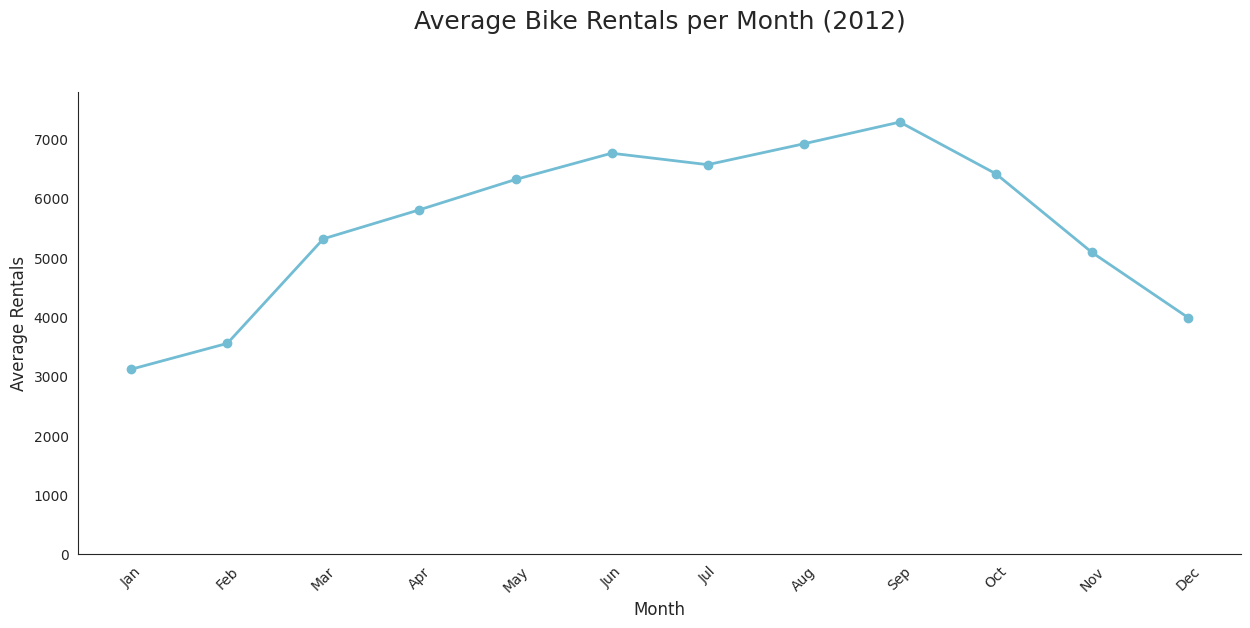

In [209]:
# Correct order of months
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Convert "Month" column to a categorical type with the correct order
avg_permonth_2012["Month"] = pd.Categorical(
    avg_permonth_2012["Month"], categories=month_order, ordered=True
)

# Sort the DataFrame by the month category
avg_permonth_2012 = avg_permonth_2012.sort_values(by="Month")

# Plot line chart
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(avg_permonth_2012["Month"], avg_permonth_2012["avg_rentals"],
        marker='o', linewidth=2, color="#72BCD4")

# Remove background
ax.set_facecolor("white")   # Background color of the plot
fig.patch.set_facecolor("white")  # Background color of the figure
ax.spines["top"].set_visible(False)  # Remove top border
ax.spines["right"].set_visible(False)  # Remove right border

# Set the Y-axis to start at zero
ax.set_ylim(0, avg_permonth_2012["avg_rentals"].max() + 500)  # Add a little margin at the top

# Set title and labels

plt.title("Average Bike Rentals per Month (2012)\n\n", loc="center", fontsize=18)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Rentals", fontsize=12)
plt.xticks(fontsize=10, rotation=45)  # To avoid overlapping month names
plt.yticks(fontsize=10)

# Remove grid if not needed
ax.grid(False)

# Show plot
plt.show()


**Insight dari Data**  
-  **Puncak Penyewaan Sepeda**  
   - **Bulan September memiliki rata-rata peminjaman tertinggi (7,285.77)**, diikuti oleh **Agustus (6,919.45), Juni (6,761.00), dan Juli (6,567.96)**.  
   - Ini mengindikasikan bahwa bulan-bulan musim panas hingga awal musim gugur (Juni–September) adalah **periode dengan aktivitas peminjaman tertinggi**.  
   - Faktor cuaca yang lebih nyaman, liburan musim panas, serta aktivitas luar ruangan yang meningkat kemungkinan menjadi penyebab utama.  

- **Penurunan Drastis**  
   - **Januari dan Februari memiliki angka peminjaman terendah** dengan rata-rata **3,120.77 dan 3,556.45**.  
   - Desember juga menunjukkan angka yang relatif rendah (**3,990.74**), yang kemungkinan dipengaruhi oleh cuaca dingin dan salju.  
   - Kondisi ini bisa disebabkan oleh suhu yang lebih dingin dan kurangnya motivasi masyarakat untuk bersepeda saat musim dingin.  

-  **Transisi dari Maret  ke Mei Menunjukkan Tren Peningkatan**  
   - **Peminjaman mulai meningkat dari Maret (5,318.55) hingga Mei (6,318.23)**.  
   - Ini menandakan bahwa dengan semakin hangatnya cuaca, **permintaan terhadap sepeda mulai pulih** setelah musim dingin.  

- **Penurunan Setelah Oktober**  
   - **November mengalami penurunan signifikan dibandingkan Oktober (6,414.23 ke 5,088.80)**.  
   - Ini menunjukkan bahwa setelah puncak di September dan Oktober, penggunaan sepeda mulai menurun saat memasuki musim dingin.  


 Jumlah tren rata rata penyewaan sepeda cenderung rendah di awal dan akhir tahun, dengan puncak di pertengahan tahun. Dan Yang paling banyak di tahun 2012 itu di bulan september


### Pertanyaan 3: Pada musim mana yang memiliki jumlah penyewaan terbanyak ?

In [210]:
# Group the data by season and sum the total rentals for each season
rentals_per_season = day_df.groupby("season")[["cnt"]].sum().reset_index()

# Ensure the "season" column is correctly assigned
rentals_per_season["season"] = rentals_per_season["season"]

# Rename columns for clarity
rentals_per_season.columns = ["Season", "total_rentals"]

# Sort by total rentals in descending order
rentals_per_season = rentals_per_season.sort_values(by="total_rentals", ascending=False)

# Display the result
rentals_per_season


,Season,total_rentals
0,Fall,1061129
2,Summer,918589
3,Winter,841613
1,Spring,471348


<ipython-input-211-485e36d3dc31>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Season", y="total_rentals", data=rentals_per_season, palette=colors, ax=ax)


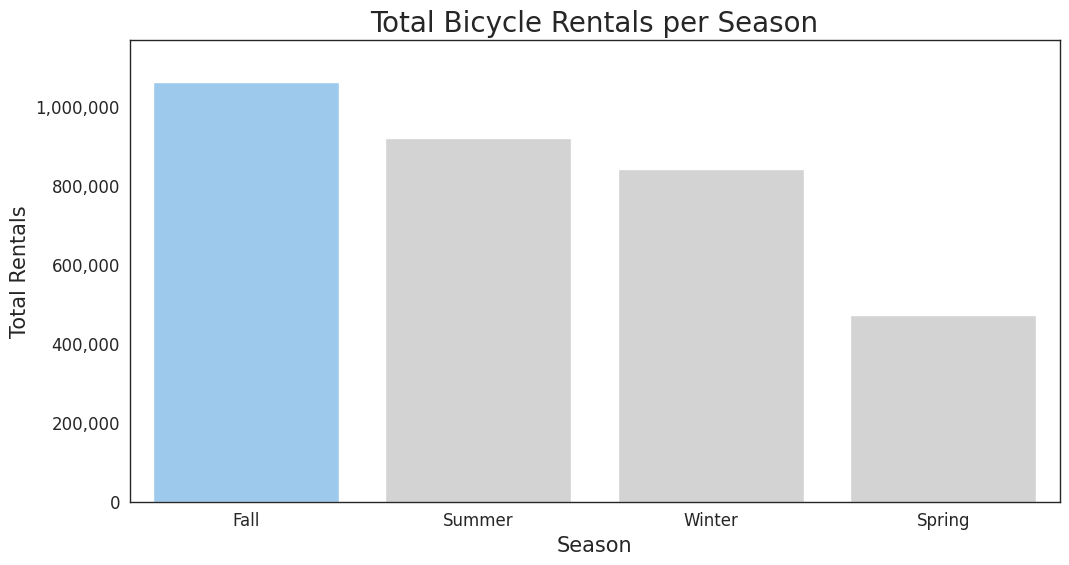

In [211]:
# Menggunakan style dengan latar belakang putih
sns.set_style("white")

# Menentukan musim dengan penyewaan tertinggi
max_season = rentals_per_season.loc[rentals_per_season["total_rentals"].idxmax(), "Season"]

# Menentukan warna: musim dengan penyewaan tertinggi biru, lainnya abu-abu
colors = ["#90CAF9" if season == max_season else "#D3D3D3" for season in rentals_per_season["Season"]]

# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(12, 6))

# Membuat barplot untuk total penyewaan per musim
sns.barplot(x="Season", y="total_rentals", data=rentals_per_season, palette=colors, ax=ax)

# Menyesuaikan batas atas sumbu y agar lebih proporsional
ax.set_ylim(0, rentals_per_season["total_rentals"].max() * 1.1)

# Memformat angka pada sumbu y agar lebih mudah dibaca
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  # Format angka dengan koma

# Menampilkan kembali garis pinggir (spines)
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)  # Bisa diatur ketebalannya

# Menambahkan label dan judul
ax.set_ylabel("Total Rentals", fontsize=15)
ax.set_xlabel("Season", fontsize=15)
ax.set_title("Total Bicycle Rentals per Season", fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=12)

# Menampilkan grafik
plt.show()

 **Insight**  

- **Musim Gugur (Fall) adalah Puncak Penyewaan Sepeda**  
   - Total penyewaan tertinggi terjadi pada musim gugur (1,061,129), kemungkinan karena suhu yang nyaman dan kondisi cuaca yang mendukung.  

- **Musim Panas (Summer) Juga Memiliki Angka Penyewaan Tinggi**  
   - Dengan 918,589 penyewaan, musim panas menempati posisi kedua, didorong oleh liburan musim panas dan aktivitas luar ruangan yang meningkat.  

- **Musim Dingin (Winter) Memiliki Angka Penyewaan yang Relatif Stabil**  
   - Meskipun cuaca lebih dingin, penyewaan tetap cukup tinggi (841,613), menunjukkan bahwa sepeda masih digunakan sebagai transportasi utama.  

- **Musim Semi (Spring) Memiliki Jumlah Penyewaan Terendah**  
   - Penyewaan paling sedikit (471,348), kemungkinan karena cuaca yang masih kurang stabil setelah musim dingin dan sebelum memasuki puncak aktivitas bersepeda.

Berdasarkan grafik di atas musim fall/gugur memiliki jumlah penyewaan terbanyak

### Pertanyaan 4: Berapa banyak jumlah penyewaan sepeda antara hari kerja dan akhir pekan?

In [212]:
# Grouping by working day and summing the rentals
rentals_working_day = day_df.groupby("workingday")[["cnt"]].sum().reset_index()

# Replace column names
rentals_working_day.columns = ["Day", "total_rentals"]

# Replace 'Yes' with 'Working Day' and 'No' with 'Holiday'
rentals_working_day["Day"] = rentals_working_day["Day"].replace({"Yes": "Working Day", "No": "Holiday"})

# Sorting by total_rentals in descending order
rentals_working_day = rentals_working_day.sort_values(by="total_rentals", ascending=False)

# Display the result
rentals_working_day


,Day,total_rentals
1,Working Day,2292410
0,Holiday,1000269


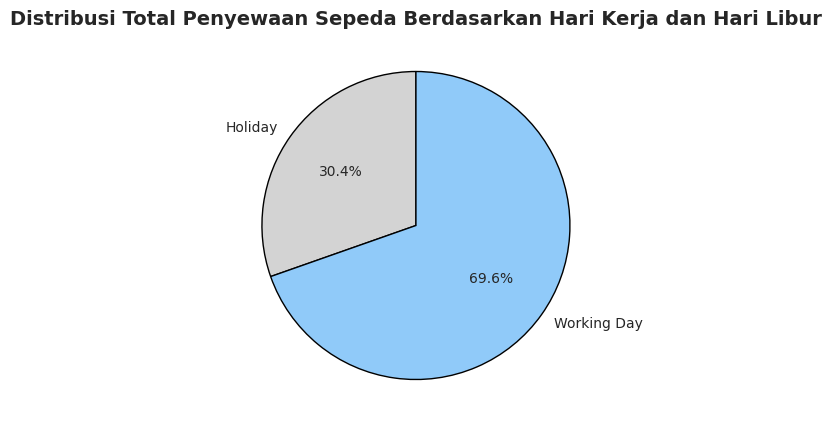

In [213]:
# Menghitung total penyewaan untuk Hari Kerja dan Hari Libur
total_rentals = rentals_working_day.groupby("Day")["total_rentals"].sum()

# Menentukan indeks dengan nilai tertinggi
max_index = total_rentals.idxmax()

# Menentukan warna, dengan nilai tertinggi diberi warna biru
colors = ["#D3D3D3"] * len(total_rentals)
colors[list(total_rentals.index).index(max_index)] = "#90CAF9"  # Warna biru untuk nilai tertinggi

# Menghapus latar belakang grid
sns.set_style("white")

# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(8, 5))

# Membuat pie chart
ax.pie(
    total_rentals,
    labels=total_rentals.index,
    autopct="%1.1f%%",
    colors=colors,
    startangle=90,
    wedgeprops={"edgecolor": "black"}
)

# Menambahkan title
ax.set_title("Distribusi Total Penyewaan Sepeda Berdasarkan Hari Kerja dan Hari Libur", fontsize=14, fontweight="bold")

# Menampilkan plot
plt.show()

**Insight**

- **Lebih Banyak Penyewaan di Hari Kerja**  
   - Total penyewaan sepeda pada hari kerja mencapai **2,292,410**, menunjukkan bahwa sepeda banyak digunakan sebagai sarana transportasi harian, kemungkinan oleh pekerja dan pelajar.  

- **Penyewaan pada Akhir Pekan dan Hari Libur Masih Signifikan**  
   - Meskipun lebih rendah (1,000,269), angka ini tetap menunjukkan bahwa banyak orang menyewa sepeda untuk aktivitas rekreasi atau perjalanan santai saat libur.  

- **Polarisasi Penggunaan Sepeda**  
   - Tren ini menunjukkan bahwa sepeda tidak hanya digunakan untuk rekreasi tetapi juga untuk mobilitas harian, yang bisa menjadi peluang bagi penyedia layanan untuk menargetkan program atau promosi berdasarkan kebutuhan pengguna pada hari kerja dan akhir pekan.

Jumlah penyewa sepeda di hari kerja sebanyak 69.6% dan di hari libur 30.4%

### Pertanyaan 5: Pada jam berapa penyewaan sepeda paling tinggi dalam sehari?

In [214]:
# Grouping by hour and calculating the total rentals per hour
rentals_per_hour = hour_df.groupby("hr")[["cnt"]].sum().reset_index()

# Renaming columns
rentals_per_hour.columns = ["Hour", "total_rentals"]

# Sorting by total rentals in descending order
rentals_per_hour_sorted = rentals_per_hour.sort_values(by="total_rentals", ascending=False)

# Finding the top 5 hours with the highest total rentals
top_5 = rentals_per_hour_sorted.nlargest(5, "total_rentals")


In [215]:
rentals_per_hour_sorted

,Hour,total_rentals
17,17,336860
18,18,309772
8,8,261001
16,16,227748
19,19,226789
13,13,184919
12,12,184414
15,15,183149
14,14,175652
20,20,164550


<ipython-input-216-f687f4119115>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


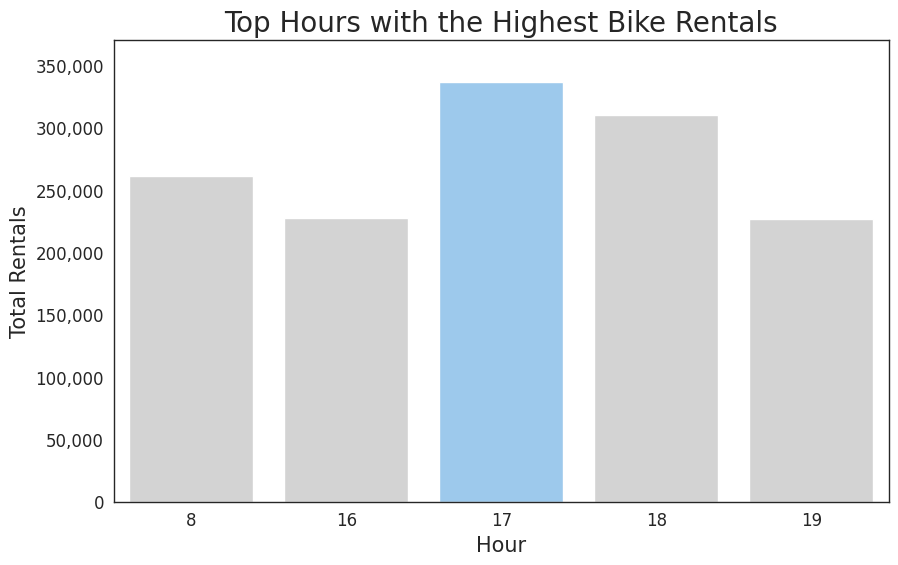

In [216]:
# Mengambil 5 jam dengan total penyewaan tertinggi
top_5 = rentals_per_hour.nlargest(5, "total_rentals")

# Semua bar berwarna abu-abu
colors = ["#D3D3D3"] * len(top_5)

# Mengubah warna bar ke-3 menjadi biru
colors[2] = "#90CAF9"  # Warna biru untuk bar ke-3

# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(10, 6))

# Membuat bar chart dengan warna yang telah ditentukan
sns.barplot(
    x="Hour",
    y="total_rentals",
    data=top_5,
    palette=colors,  # Menggunakan warna yang sudah diatur
    ax=ax
)

# Menampilkan kembali garis pinggir (spines)
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)  # Menyesuaikan ketebalan garis pinggir

# Menyesuaikan batas atas sumbu y agar lebih proporsional
ax.set_ylim(0, top_5["total_rentals"].max() * 1.1)

# Memformat angka pada sumbu y agar lebih mudah dibaca
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Menambahkan judul dan label
ax.set_title("Top Hours with the Highest Bike Rentals", loc="center", fontsize=20)
ax.set_xlabel("Hour", fontsize=15)
ax.set_ylabel("Total Rentals", fontsize=15)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Menampilkan grafik
plt.show()


**Insight**
- Berdasarkan grafik diatas pada jam 17 penyewaan sepeda paling tinggi dalam sehari
- Jam Sibuk Sore Hari (Pukul 17:00 - 18:00) Menjadi Puncak Penyewaan Penyewaan tertinggi terjadi pada pukul 17:00 (336,860 penyewaan) dan 18:00 (309,772 penyewaan), yang kemungkinan besar disebabkan oleh jam pulang kerja dan kuliah, di mana banyak orang menggunakan sepeda sebagai transportasi utama.

## Analisis Lanjutan

### Clustering

#### Segmentasi Kepadatan Penyewaan Sepeda Berdasarkan Jumlah Penyewa Per Hari

Binning jumlah penyewa (cnt) menjadi kategori kepadatan:
- 0 - 1999 masuk kategori "Sepi"
- 2000 - 4999 masuk kategori "Sedang"
- 5000 ke atas masuk kategori "Ramai"

In [217]:
# Menentukan batasan kategori kepadatan
bins = [0, 2000, 5000, float('inf')]
labels = ['Sepi', 'Sedang', 'Ramai']

# Menerapkan binning ke kolom 'cnt'
day_df['kategori_kepadatan'] = pd.cut(day_df['cnt'], bins=bins, labels=labels, right=False)

# Menampilkan beberapa data setelah binning
density_category_df = day_df[['dteday', 'cnt', 'kategori_kepadatan']]
density_category_df.head()

,dteday,cnt,kategori_kepadatan
0,2011-01-01,985,Sepi
1,2011-01-02,801,Sepi
2,2011-01-03,1349,Sepi
3,2011-01-04,1562,Sepi
4,2011-01-05,1600,Sepi


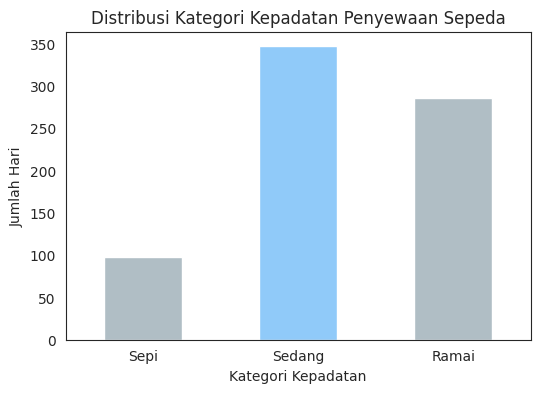

In [218]:
# Menghitung jumlah hari dalam setiap kategori kepadatan
kategori_counts = day_df['kategori_kepadatan'].value_counts()

# Mengurutkan kategori sesuai urutan yang diinginkan
order = ["Sepi", "Sedang", "Ramai"]
kategori_counts = kategori_counts.reindex(order, fill_value=0)  # Mengisi 0 jika ada kategori yang tidak muncul

# Menentukan warna: kategori dengan nilai tertinggi berwarna biru, lainnya abu-abu
colors = ['#B0BEC5', '#B0BEC5', '#B0BEC5']  # Default semua abu-abu
max_index = kategori_counts.idxmax()  # Cari kategori dengan nilai tertinggi
max_position = order.index(max_index)  # Ambil posisi di dalam urutan yang kita tentukan
colors[max_position] = '#90CAF9'  # Ubah warna tertinggi menjadi biru

# Membuat bar chart
plt.figure(figsize=(6, 4))
kategori_counts.plot(kind='bar', color=colors)

# Menambahkan label dan judul
plt.xlabel('Kategori Kepadatan')
plt.ylabel('Jumlah Hari')
plt.title('Distribusi Kategori Kepadatan Penyewaan Sepeda')
plt.xticks(rotation=0)

# Menampilkan grafik
plt.show()

Insight :
- sebagian besar hari memiliki jumlah penyewaan dalam kategori "Sedang" (2.000 - 4.999 penyewaan), yang berarti penyewaan sepeda cenderung stabil dan tidak terlalu ekstrem (jarang sepi atau sangat ramai).

Saran atau rekomendasi:
- Meski jumlah penyewaan cenderung stabil, perlu dipersiapkan strategi untuk menghadapi lonjakan di hari-hari tertentu (misalnya, saat cuaca cerah atau akhir pekan dengan event khusus), seperti menambah jumlah sepeda, menyediakan sistem pemesanan, dan memastikan perawatan sepeda agar tetap dalam kondisi optimal.

#### Total penyewaan sepeda berdasarkan per kategori kelembaban

In [219]:
# Tentukan batasan bin secara eksplisit
bins = [0, 0.4, 0.7, 1]  # 1 adalah nilai maksimum untuk normalisasi
labels = ['Rendah', 'Sedang', 'Tinggi']

# Melakukan binning
day_df['humidity_category'] = pd.cut(day_df['hum'], bins=bins, labels=labels, include_lowest=True)

In [220]:
# Menghitung jumlah hari dalam setiap kategori kelembaban
humidity_users_df = day_df.groupby("humidity_category").agg({
    "cnt": ["count"]
})

# Menampilkan hasil
humidity_users_df

<ipython-input-220-bc6127a3168d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  humidity_users_df = day_df.groupby("humidity_category").agg({


,cnt
,count
humidity_category,
Rendah,30
Sedang,470
Tinggi,231


**Insight**  

- Penyewaan tertinggi terjadi pada kelembaban sedang (0.4 ≤ hum < 0.7) dengan **470 penyewaan**.  
- Penyewaan turun hampir 50% pada kelembaban tinggi (≥ 0.7) menjadi 231 penyewaan.  
- Penyewaan sangat rendah pada kelembaban rendah (< 0.4), hanya 30 penyewaan.  

Mayoritas penyewaan terjadi saat kelembaban sedang. Saat kelembaban tinggi, penyewaan menurun drastis, kemungkinan karena kondisi tidak nyaman untuk bersepeda.



**Saran atau rekomendasi**

- Tingkatkan promosi saat kelembaban tinggi (≥ 0.7), misalnya diskon atau cashback.  
- Optimalkan stok sepeda saat kelembaban sedang (0.4 - 0.7) karena penyewaan tertinggi terjadi di kondisi ini.  
- Berikan fasilitas tambahan seperti air mineral atau masker saat kelembaban rendah (< 0.4) untuk meningkatkan kenyamanan penyewa.

## Conclusion

- Conclusion Pertanyaan 1 : Kinerja penyewaan sepeda menunjukkan tren positif, dengan total penyewaan meningkat secara signifikan dari 1,243,103 pada tahun 2011 menjadi 2,049,576 pada tahun 2012, menandakan meningkatnya minat atau penggunaan layanan penyewaan sepeda.
- Conclusion Pertanyaan 2 : Rata-rata penyewaan sepeda tertinggi terjadi pada September (7,285.77), diikuti oleh Agustus (6,919.45), Juni (6,761.00), dan Juli (6,567.96), sementara Januari (3,120.77) dan Februari (3,556.45) memiliki rata-rata terendah; tren meningkat dari Maret (5,318.55) hingga Mei (6,318.23) sebelum menurun setelah Oktober, dengan November turun dari 6,414.23 di Oktober menjadi 5,088.80.
- Conclusion Pertanyaan 3 : Musim gugur (Fall) menjadi puncak penyewaan sepeda terbanyak dengan total 1,061,129 penyewaan, kemungkinan karena suhu yang nyaman dan kondisi cuaca yang mendukung, diikuti oleh musim panas (Summer) dengan 918,589 penyewaan yang didorong oleh liburan dan meningkatnya aktivitas luar ruangan, sementara musim dingin (Winter) tetap memiliki angka penyewaan yang cukup tinggi (841,613) meskipun cuaca lebih dingin, menunjukkan bahwa sepeda masih digunakan sebagai transportasi utama, sedangkan musim semi (Spring) mencatat jumlah penyewaan terendah (471,348) yang kemungkinan disebabkan oleh cuaca yang masih kurang stabil setelah musim dingin dan sebelum memasuki puncak aktivitas bersepeda.
- Conclusion Pertanyaan 4 : Total penyewaan sepeda didominasi oleh hari kerja, dengan 69,6% (2,292,410) penyewaan, sementara 30,4% (1,000,269) terjadi pada hari libur.
- Conclusion Pertanyaan 5 :Penyewaan sepeda tertinggi terjadi pada pukul 17:00 (336,860 penyewaan) dan 18:00 (309,772 penyewaan), kemungkinan besar karena jam pulang kerja dan kuliah, di mana banyak orang menggunakan sepeda sebagai transportasi utama.
- sebagian besar hari memiliki jumlah penyewaan dalam kategori "Sedang" (2.000 - 4.999 penyewaan), yang berarti penyewaan sepeda cenderung stabil dan tidak terlalu ekstrem (jarang sepi atau sangat ramai).
- Mayoritas penyewaan terjadi pada kelembaban sedang (0.4 ≤ hum < 0.7) dengan 470 penyewaan, namun turun hampir 50% saat kelembaban tinggi (≥ 0.7) menjadi 231 penyewaan (31.5%), dan mencapai titik terendah pada kelembaban rendah (< 0.4) dengan hanya 30 penyewaan, kemungkinan karena kondisi yang kurang nyaman untuk bersepeda.



**Saran atau Rekomendasi**  

1. **Meningkatkan Ketersediaan Sepeda untuk Mengakomodasi Tren Pertumbuhan**  
   - Dengan peningkatan signifikan dalam penyewaan dari 2011 ke 2012, layanan penyewaan sepeda dapat menambah jumlah unit sepeda dan stasiun penyewaan untuk memenuhi permintaan yang terus meningkat.  
   - Menyediakan lebih banyak titik penyewaan di daerah dengan aktivitas tinggi seperti kawasan perkantoran dan kampus.  

2. **Optimalisasi Operasional Berdasarkan Pola Penyewaan Bulanan**  
   - Karena penyewaan tertinggi terjadi pada bulan September hingga Juli, penyedia layanan dapat meningkatkan promosi dan ketersediaan sepeda di bulan-bulan tersebut.  
   - Di bulan dengan penyewaan rendah (Januari dan Februari), dapat dilakukan strategi diskon atau program loyalitas untuk mendorong penggunaan.  

3. **Strategi Penyesuaian Layanan Berdasarkan Musim**  
   - Pada bulan dengan penyewaan tinggi (Agustus–September), bisa dilakukan penambahan unit sepeda, pemeliharaan lebih intensif, dan kampanye promosi untuk menarik lebih banyak pelanggan.  
   - Di bulan dengan penyewaan rendah (Januari–Februari), bisa diterapkan tarif lebih murah atau layanan tambahan seperti sepeda dengan perlindungan terhadap cuaca dingin.  

4. **Meningkatkan Layanan di Hari Kerja dan Akhir Pekan**  
   - Karena mayoritas penyewaan terjadi di hari kerja (69,6%), penyedia layanan bisa menyediakan jalur khusus sepeda atau kolaborasi dengan kantor dan kampus untuk mendukung mobilitas pekerja dan mahasiswa.  
   - Untuk meningkatkan penyewaan di akhir pekan, bisa dibuat paket rekreasi, seperti program bersepeda wisata atau event komunitas sepeda.  

5. **Menyesuaikan Kapasitas Layanan Berdasarkan Jam Sibuk**  
   - Dengan puncak penyewaan terjadi pada pukul 17:00–18:00, layanan bisa meningkatkan jumlah sepeda yang tersedia pada jam tersebut.  
   - Bisa diterapkan sistem pemesanan atau peminjaman cepat agar pengguna tidak kesulitan mendapatkan sepeda pada jam sibuk.  
6. Meski jumlah penyewaan cenderung stabil, perlu dipersiapkan strategi untuk menghadapi lonjakan di hari-hari tertentu (misalnya, saat cuaca cerah atau akhir pekan dengan event khusus), seperti menambah jumlah sepeda, menyediakan sistem pemesanan, dan memastikan perawatan sepeda agar tetap dalam kondisi optimal.
7. Tingkatkan promosi seperti diskon atau cashback saat kelembaban tinggi (≥ 0.7), optimalkan stok sepeda saat kelembaban sedang (0.4 - 0.7) karena penyewaan tertinggi terjadi di kondisi ini, dan berikan fasilitas tambahan seperti air mineral atau masker saat kelembaban rendah (< 0.4) untuk meningkatkan kenyamanan penyewa.

Implementasi strategi ini dapat meningkatkan efisiensi layanan penyewaan sepeda serta meningkatkan kepuasan pelanggan, baik untuk transportasi harian maupun rekreasi.